<a href="https://colab.research.google.com/github/SanaSoren/Netflix-Movies-and-TV-shows-Clustring/blob/main/Netflix_movies_and_TV_shows_analysis_sanasoren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Type : Unsupervised Learning

Team : Individual



## **PROBLEM STATEMRNT :**

> Netflix is the world's largest online streaming service provider, with over 220 million subscribers as of 2022-Q2. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn.

> We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

> The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.


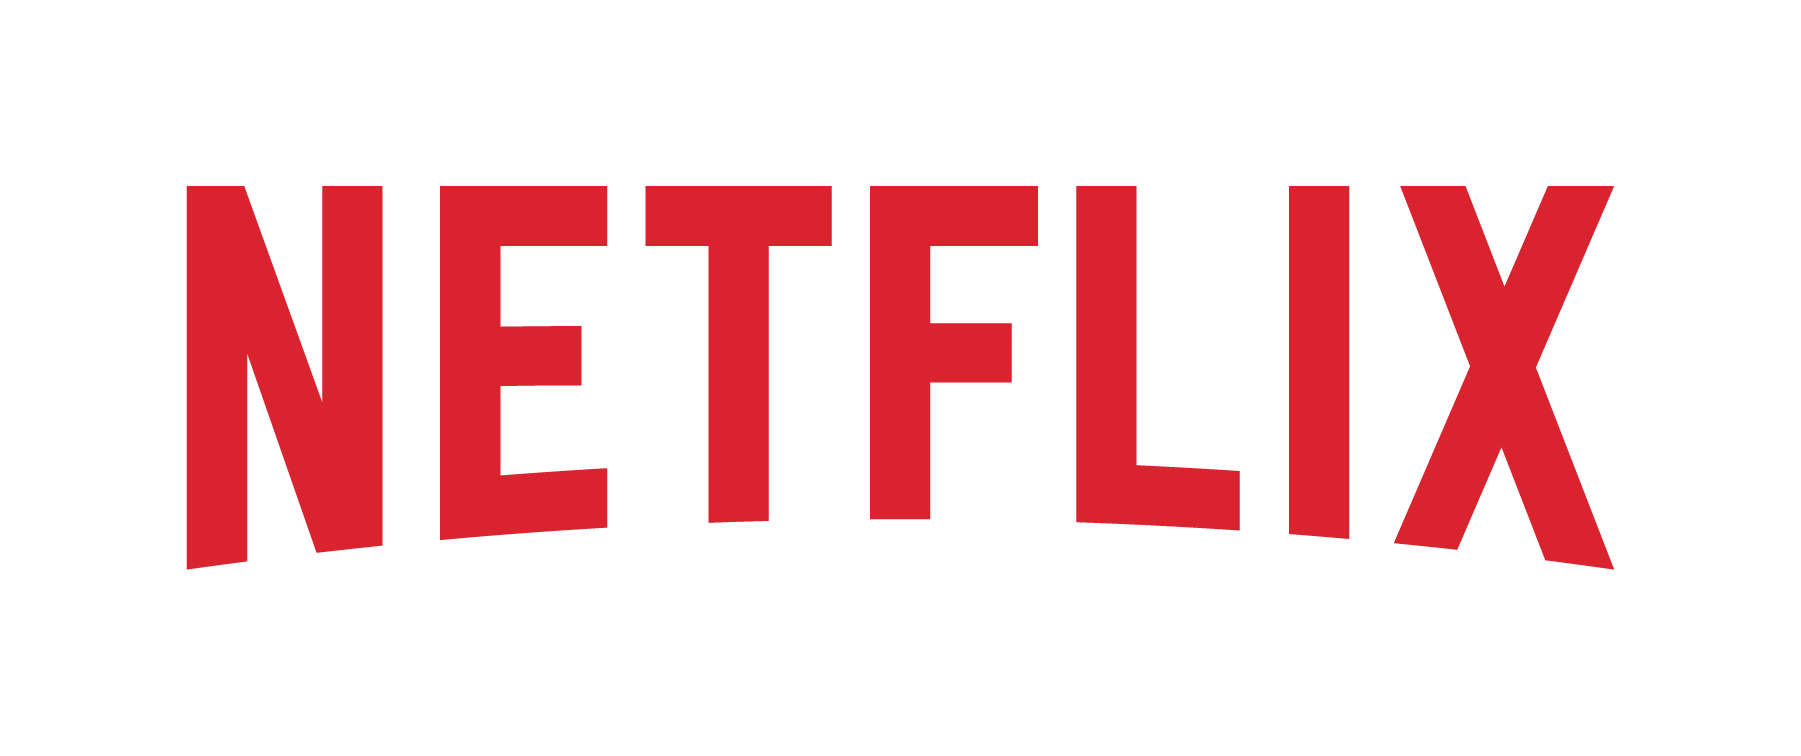

## **IMPORTING THE LIBRARIES AND DATASET**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib.ticker as mtick
#from matplotlib.pyplot import figure
#import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

#import stats 
from scipy import stats
from scipy.stats import ttest_ind

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk

#import inflect
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
from nltk.corpus import stopwords
sw = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer

import string
string.punctuation
nltk.download('omw-1.4')
#from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

%matplotlib inline
sns.set()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing the data
original_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Unsupervised_Learning/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# creating a copy
df = original_df.copy()

## **UNDERSTANDING THE DATA**

In [4]:
pd.concat([df.head(), df.tail()])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [5]:
# shape of dataframe
df.shape

(7787, 12)

> The Dataset contain 7787 records and 12 attributes

In [6]:
# Unique values in each column
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

### **ATTRIBUTES INFORMATIONS :**
> 1. show_id : Unique ID for every Movie / Tv Show
> 2. type : Identifier - A Movie or TV Show
> 3. title : Title of the Movie / Tv Show
> 4. director : Director of the Movie
> 5. cast : Actors involved in the movie / show
> 6. country : Country where the movie / show was produced
> 7. date_added : Date it was added on Netflix
> 8. release_year : Actual Releaseyear of the movie / show
> 9. rating : TV Rating of the movie / show
> 10. duration : Total Duration - in minutes or number of seasons
> 11. listed_in : Genre
> 12. description: The Summary description

## **CLEANING THE DATA**

In [7]:
# CHECKING THE DUPLICATES RECORDS
df.duplicated().value_counts()

False    7787
dtype: int64

> There are no duplicated records in the dataset

In [8]:
# MISSING VALUES IN THE DATASET
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There are many missing values in director (2389), cast (718), country (507), date_added (10), and rating (7) columns.

In [9]:
# CHECKING THE UNIQUE VALUES IN EACH ATTRIBUTES OF THE DATASET
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

> The missing values in the director, cast, and country attributes can be replaced with 'Unknown'

> 10 records with missing values in the date_added column can be dropped.

> The missing values in rating can be imputed with its mode, since this attribute is discrete.

In [10]:
# HANDLING THE MISSING VALUES
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [11]:
df.shape

(7777, 12)

> We have successfully handled all the missing values in the dataset.

In [12]:
# TOP COUNTRIES
df.country.value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [13]:
# GENRE OF SHOWS
df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

> There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.

> To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.

> Also, let's consider only the primary genre of the respective movie / TV show.

In [14]:
# CHOOSING THE PRIMARY COUNTRY AND PRIMARY GENRE TO SIMPLIFY THE ANALYSIS
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [15]:
# COUNTRY IN WHICH MOVIES WAS PRODUCE
df.country.value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [16]:
# GENRE OF SHOWS
df.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

**TYPECASTING 'duration' FROM STRING TO INTEGER :**

In [17]:
# SPLITING THE DURATION COLUMN, AND CHANGING THE DATA TYPE INTO INTEGER
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [18]:
# NUMBER OF SEASONS FOR TV SHOWS
df[df['type']=='TV Show'].duration.value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [19]:
# MOVIE LENGTH IN MINUTE
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [20]:
# DATATYPE OF DURATION
df.duration.dtype

dtype('int64')

> We have successfully converted the datatype of duration column to int.

**TYPECASTING 'date_added' FROM STRING TO DATETIME :**

In [21]:
# TYPECASTING 'date_added' FROM STRING TO DATETIME
df["date_added"] = pd.to_datetime(df['date_added'])

In [22]:
# FIRST AND LAST DATE ON WHICH A SHOW WAS ADDED ON THE NETFLIX
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

> The shows were added on Netflix between 1st January 2008 and 16th January 2021.

In [23]:
# ADDING NEW ATTRIBUTES MONTH AND YEAR OF DATE ADDED
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

<AxesSubplot:xlabel='rating', ylabel='count'>

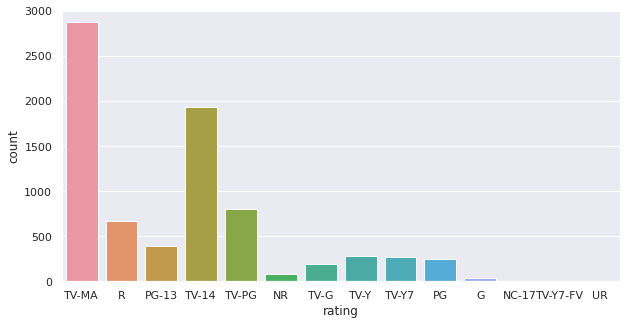

In [24]:
# AGE RATING SHOWS IN THE DATASET
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

> Highest number of shows on Netflix are rated by TV-MA, followed by TV-14 and TV-PG

In [25]:
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [26]:
# ASSINING THE RATING INTO AGE GROUPED
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['target_ages'] = df['rating'].replace(rating_map)
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

<AxesSubplot:title={'center':'MOVIE RATINGS'}, xlabel='rating', ylabel='count'>

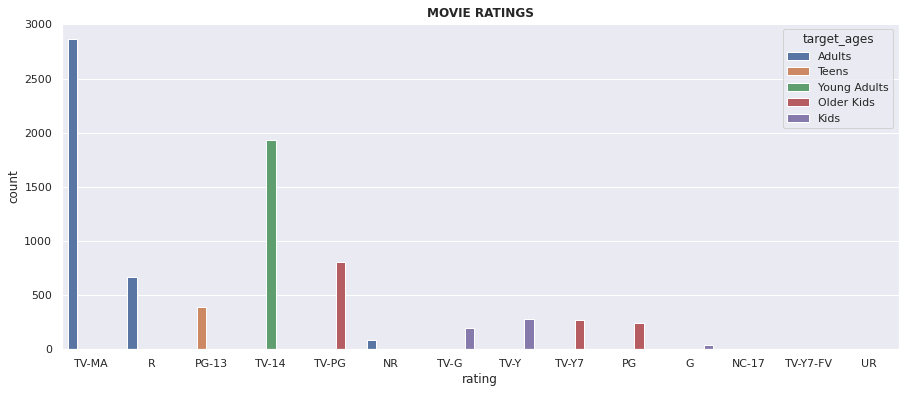

In [27]:
# MOVIE RATING BASED ON TARGET AGE GROUP
plt.figure(figsize=(15,6))
plt.title('MOVIE RATINGS', fontweight = 'bold')
sns.countplot(x='rating',hue= 'target_ages',data=df)

> Around 50% of shows on Netflix are produced for adult audience. Followed by young adults, older kids and kids. Netflix has the least number of shows that are specifically produced for teenagers than other age groups.

# **EXPLORATORY DATA ANALYSIS :**
## **UNIVARIATE ANALYSIS**

Text(0.5, 1.0, 'Movies And TV Shows In The Dataset')

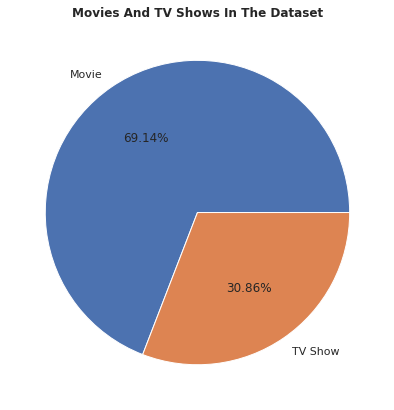

In [28]:
# NUMBER OF MOVIES AND TV SHOWS IN THE DATASET
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies And TV Shows In The Dataset', fontweight = 'bold')

> There are more movies (69.14%) than TV shows (30.86%) in the dataset.

Text(0.5, 1.0, 'Top 10 Directors By Number Of Shows Directed')

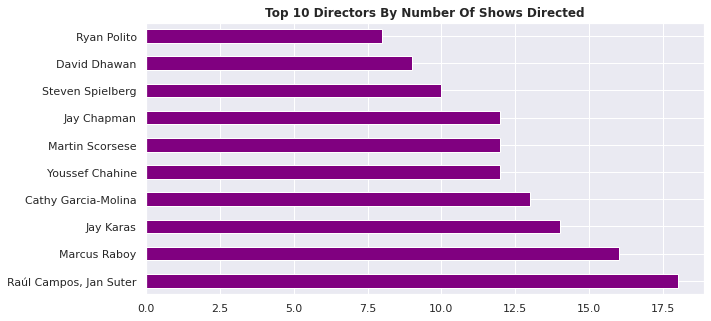

In [29]:
# TOP 10 DIRECTORS IN THE DATASET
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh', color = 'purple')
plt.title('Top 10 Directors By Number Of Shows Directed', fontweight = 'bold')

> Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.

Text(0.5, 1.0, ' Top 10 Countries With The Highest Number Of Shows')

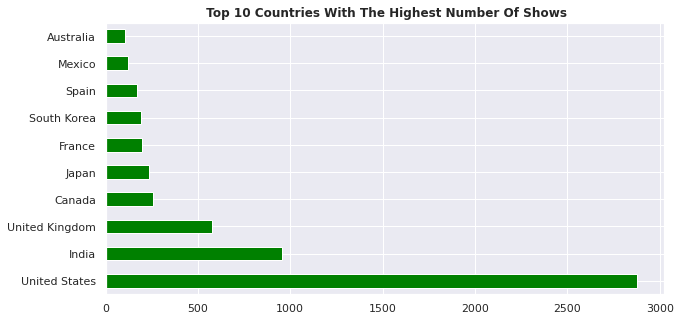

In [30]:
# TOP 10 COUNTRIES WITH THE HIGHEST NUMBER OF MOVIES / TV SHOWS IN THE DATASET
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh', color = 'green')
plt.title(' Top 10 Countries With The Highest Number Of Shows', fontweight = 'bold')

In [31]:
# % SHARES OF MOVIES / TV SHOWS BY TOP 3 COUNTRIES
df.country.value_counts().nlargest(3).sum()/len(df)*100

56.69281213835669

In [32]:
# % SHARES OF MOVIES / TV SHOWS BY TOP 10 COUNTRIES
df.country.value_counts().nlargest(10).sum()/len(df)*100

78.32068921177832

> The top 3 countries together account for about 56% of all movies and TV shows in the dataset.

> This value increases to about 78% for top ten countries.

Text(0.5, 1.0, 'DISTRIBUTION BY RELEASED YEAR')

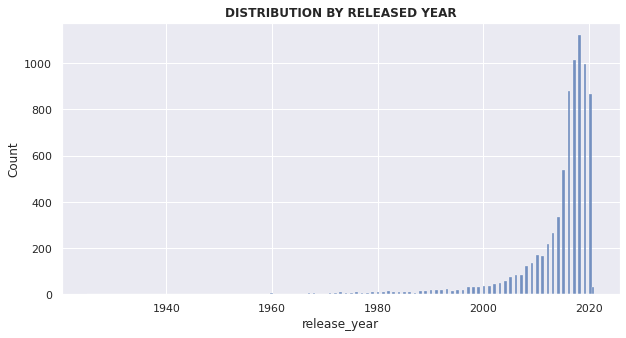

In [33]:
# VISULIZING THE YEAR IN WHICH THE MOVIES / TV WAS RELEASED
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('DISTRIBUTION BY RELEASED YEAR', fontweight = 'bold')

> Netflix has greater number of new movies / TV shows than the old ones.

Text(0.5, 1.0, 'Top 10 genres')

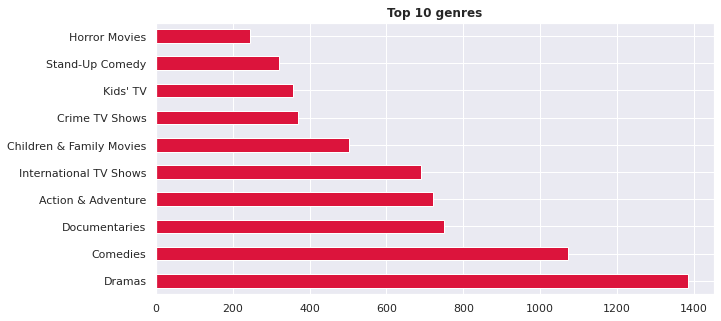

In [34]:
# TOP 10 GENRES
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh', color= 'crimson')
plt.title('Top 10 genres', fontweight = 'bold')
#sns.countplot(palette = 'cubehelix')

In [35]:
# SHARE TOP 3 GENRES
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

41.26269769834126

In [36]:
# SHARE TOP 10 GENRES
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

82.44824482448246

> The dramas is the most popular genre followed by comedies and documentaries.

> These three genres account for about 41% of all movies and TV shows.

> This value increases to about 82% for top 10 genres.

Text(0.5, 0, '')

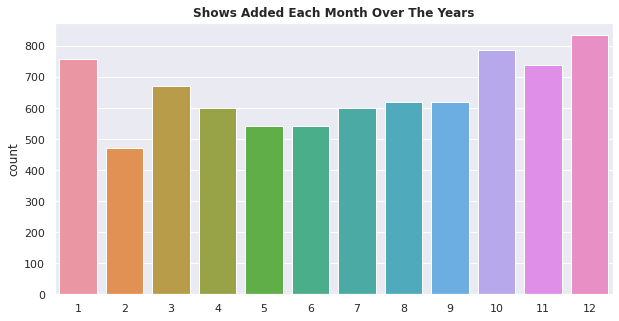

In [37]:
# NUMBER OF SHOWS ADDED ON DIFFERENT MONTHS
plt.figure(figsize = (10,5)) 
sns.countplot(df['month_added'])
plt.title('Shows Added Each Month Over The Years', fontweight = 'bold')
plt.xlabel('')

> Over the years a greater number of shows were added in the months of October, November, December, and January.

Text(0.5, 0, '')

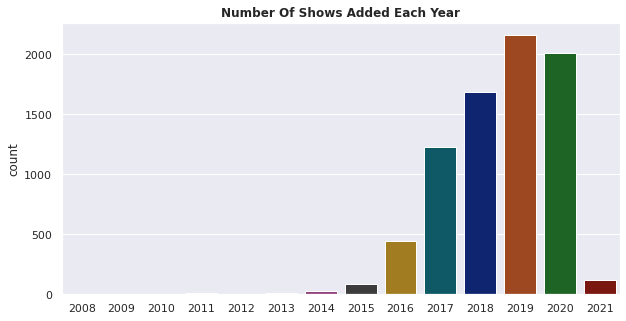

In [38]:
# NUMBER OF SHOWS ADDED OVER THE YEARS
plt.figure(figsize = (10,5)) 
sns.countplot(df['year_added'], palette = 'dark')
plt.title('Number Of Shows Added Each Year', fontweight = 'bold')
plt.xlabel('')

> Netflix continuous to add more shows on its platform over the years.

> There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.

> We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.

Text(0.5, 1.0, 'Number Of Shows On Netflix For Different Age Groups')

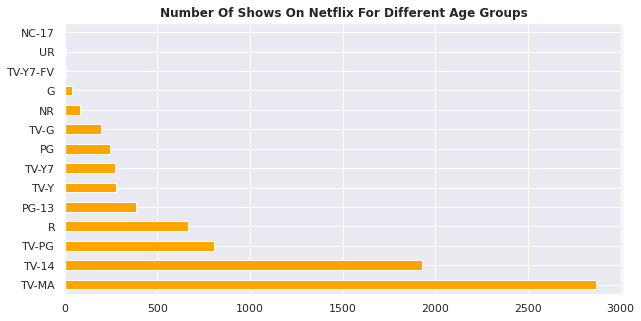

In [39]:
# NUMBER OF SHOWS ON NETFLIX ON DIFFERNT AGE GROUPS
plt.figure(figsize=(10,5))
df.rating.value_counts().plot(kind='barh', color = 'orange')
plt.title('Number Of Shows On Netflix For Different Age Groups', fontweight = 'bold')

> The majority of the shows on Netflix are catered to the needs of adult and young adult population.

### **BIVARIATE ANALYSIS :**

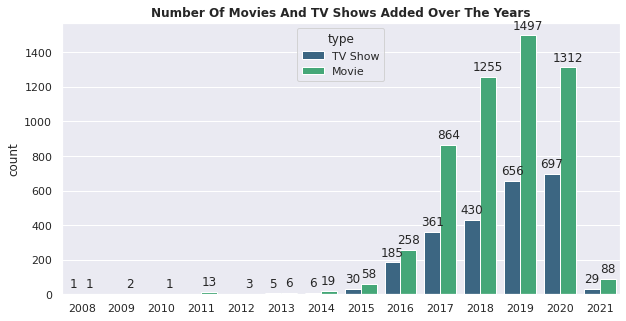

In [40]:
# NUMBER OF MOVIES AND TV SHOWS ADDED OVER THE YEARS
plt.figure(figsize=(10,5))
p = sns.countplot(x='year_added',data=df, hue='type',palette="viridis")
plt.title('Number Of Movies And TV Shows Added Over The Years', fontweight = 'bold')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
             ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

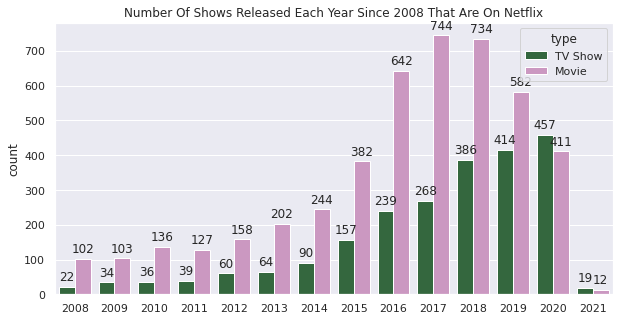

In [41]:
# NUMBER OF SHOWS RELEASED EACH YEAR SINCE 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type',order = order,palette="cubehelix" )
plt.title('Number Of Shows Released Each Year Since 2008 That Are On Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()),
             ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

> Over the years, Netflix has consistently focused on adding more shows in its platform.

> Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.

> This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.

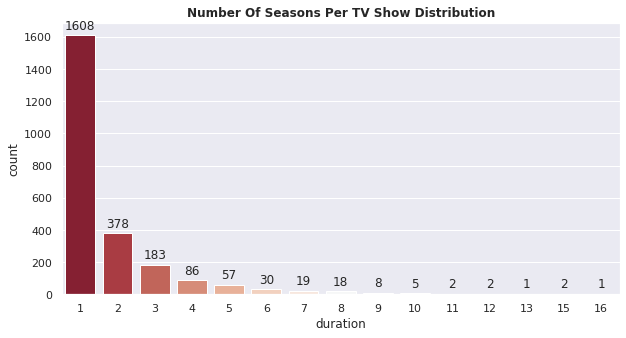

In [42]:
# SEASONS OF EACH TV SHOWS
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'], palette = "RdBu")
plt.title('Number Of Seasons Per TV Show Distribution', fontweight = 'bold')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()),
             ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [43]:
# % OF TV SHOWS WITH JUST 1 SEASON
len(df[(df['type']=='TV Show') & (df['duration']==1)]) / len(df[df['type']=='TV Show'])* 100

67.0

>The TV series in the dataset have up to 16 seasons, however the bulk of them only have one. This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.

>There are very few TV shows that have more than 8 seasons.

Text(0.5, 1.0, 'Movie Duration Distribution')

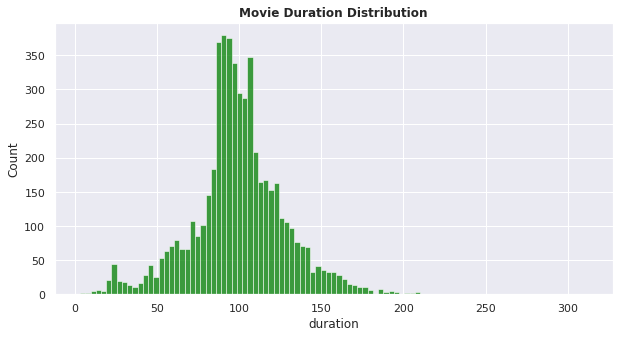

In [44]:
# LENGTH OF MOVIE ANALYSIS
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'], color = 'green')
plt.title('Movie Duration Distribution', fontweight = 'bold')

In [45]:
# MOVIE STATISTICS
df[df['type']== 'Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

> The length of a movie may range from 3 min to 312 minutes, and the distribution is almost normally distributed.

Text(0.5, 0, 'Year')

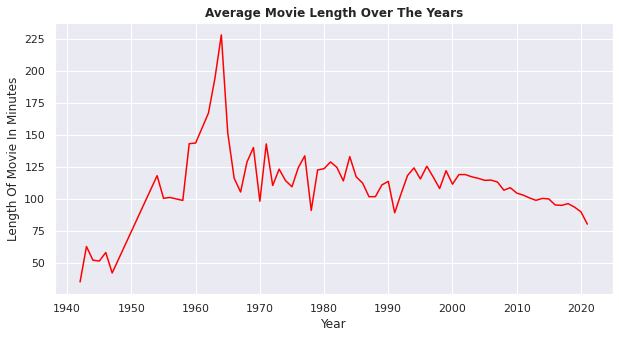

In [46]:
# AVERAGE MOVIE LENGTH OVER THE YEAR
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line', color = 'red')
plt.title('Average Movie Length Over The Years', fontweight = 'bold')
plt.ylabel('Length Of Movie In Minutes')
plt.xlabel('Year')

In [47]:
# MOVIE RELEASE YEAR STATISTICS
df[df['type']== 'Movie'].release_year.describe()

count    5377.000000
mean     2012.920030
std         9.663282
min      1942.000000
25%      2012.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

> Netflix has several movies on its site, including those that were released in way back 1942.

> As per the plot, movies made in the 1940s had a fairly short duration on average.

> On average, movies made in the 1960s have the longest movie length.

> The average length of a movie has been continuously decreasing since the 2000s.

Text(0.5, 1.0, 'Top 10 Genres For Movies')

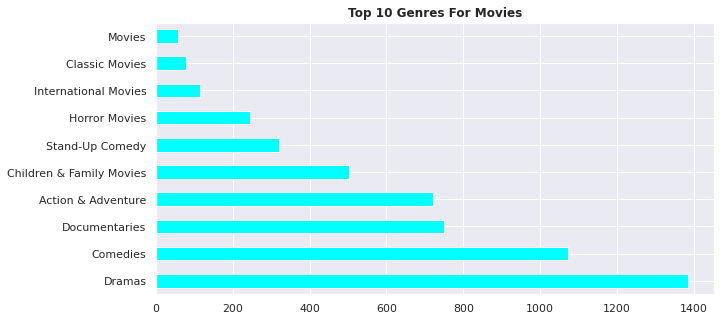

In [48]:
# TOP 10 GENRES FOR MOVIE
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh', color = 'cyan')
plt.title('Top 10 Genres For Movies', fontweight = 'bold')

> Dramas, comedies, and documentaries are the most popular genre for the movies on Netflix.

Text(0.5, 1.0, 'Top 10 Genres For TV Shows')

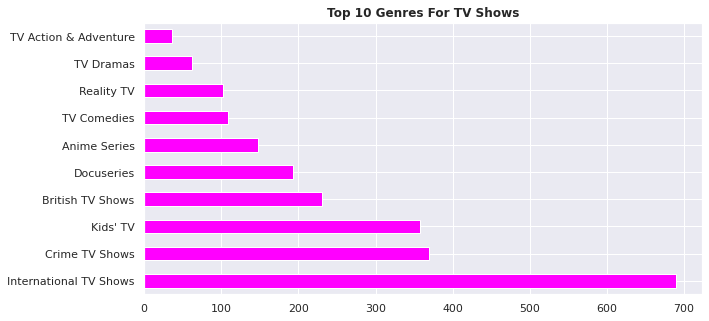

In [49]:
# TOP 10 GENRES FOR TV SHOWS
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh', color = 'magenta')
plt.title('Top 10 Genres For TV Shows', fontweight = 'bold')

> International, crime, and kids are the most popular genre for TV shows on Netflix.

Text(0.5, 1.0, 'Top 10 Movie Directors')

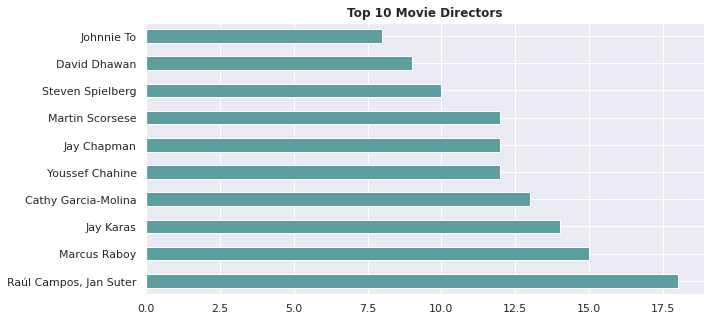

In [50]:
# TOP 10 MOVIE DIRECTORS
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh', color = "cadetblue")
plt.title('Top 10 Movie Directors', fontweight = 'bold')

> Raul Campos and Jan Suter have togather directed in 18 movies, higher than anyone yet.

> This is followed by Marcus Roboy, Jay Karas, and Cathy Gracia-Molina

Text(0.5, 1.0, 'Top 10 TV Show Directors')

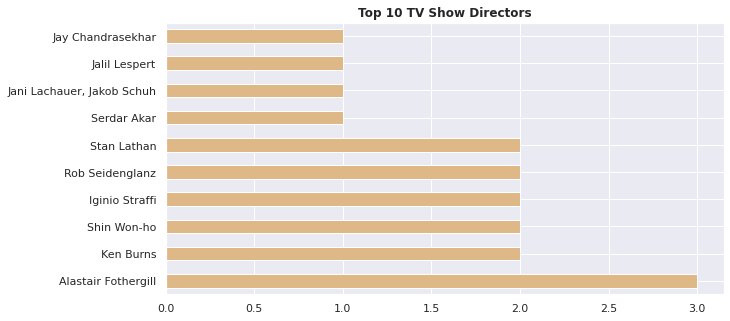

In [51]:
# TOP 10 TV SHOWS DIRECTORS
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh', color = 'burlywood')
plt.title('Top 10 TV Show Directors', fontweight = 'bold')

> Alastair Fothergill has directed three TV shows, the most of any director.

> Only six directors have directed more than one television show.

Text(0.5, 1.0, 'Actors Who Have Appeared In Highest Number Of Movies')

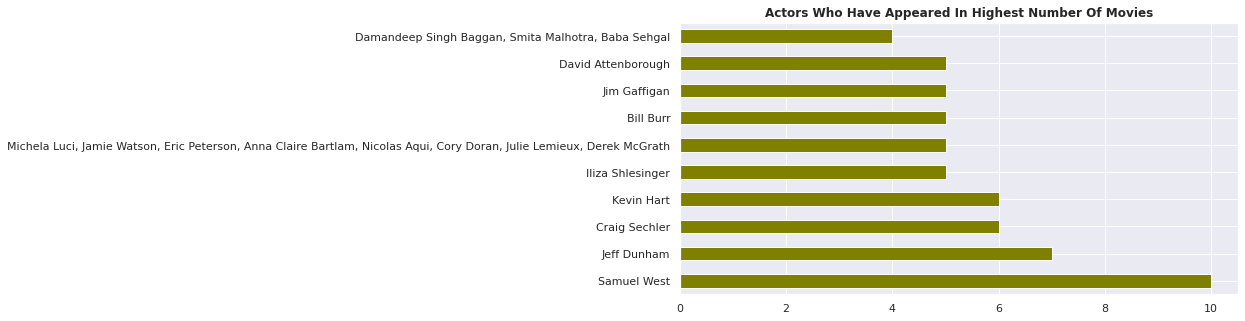

In [52]:
# TOP ACTORS FOR MOVIES
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh', color = 'olive')
plt.title('Actors Who Have Appeared In Highest Number Of Movies', fontweight = 'bold')

> Samuel West has appeared in 10 movies, followed by Jeff Dunham with 7 movies.

Text(0.5, 1.0, 'Actors Who Have Appeared In Highest Number Of TV Shows')

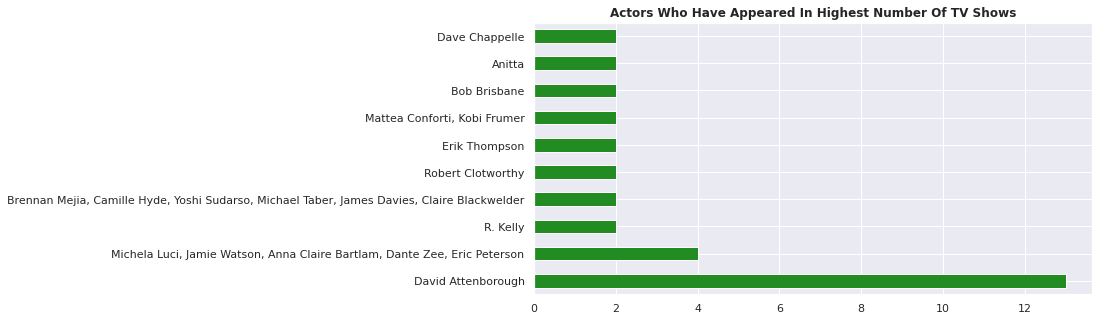

In [53]:
# TOP ACTORS FOR TV SHOWS
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh', color = 'forestgreen')
plt.title('Actors Who Have Appeared In Highest Number Of TV Shows', fontweight = 'bold')

> David Attenborough has appeared in 13 TV shows, followed by Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson with 4 TV shows.

> Some keywords in Netflix show descriptions: life, family, new, love, young, world, group, death, man, woman, murder, son, girl, documentary, secret.

### **DATA PREPROCESSING :**

In [54]:
# All the movies and TV shows in different dataframe
movies = df[df['type']=='Movie']
tv_shows= df[df['type']=='TV Show']

([<matplotlib.patches.Wedge at 0x7f6b7a743670>,
 [Text(-0.8902585632950727, -0.6460957285726268, 'Others'),
  Text(0.9711911599582614, 0.7048317038974106, 'Originals')],
 [Text(-0.4855955799791305, -0.3524158519487055, '69.98%'),
  Text(0.5665281766423191, 0.4111518272734894, '30.02%')])

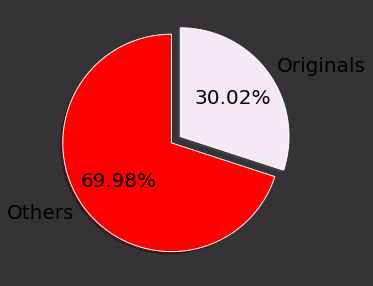

In [55]:
movies['originals'] = np.where(movies['release_year']==movies['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])

> 30% movies released on Netflix. 70% movies added on Netflix were released earlier by different mode.

**LET'S MAKE SOME HYPOTHESIS :**

> HO:netflix has more movies than tv shows

> H1:netflix not have more movies than TV SHOWS

In [56]:
df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

In [57]:
movies

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,target_ages,originals
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,12,2016,Adults,Yes
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",12,2018,Adults,No
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11,2017,Teens,No
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,1,2020,Teens,No
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2019,TV-MA,95,Horror Movies,"After an awful accident, a couple admitted to ...",6,2020,Adults,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88,Children & Family Movies,"Dragged from civilian life, a former superhero...",1,2020,Older Kids,No
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,2005,TV-MA,99,Dramas,When Lebanon's Civil War deprives Zozo of his ...,10,2020,Adults,No
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,3,2019,Young Adults,No
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,2019,TV-MA,44,Documentaries,"In this documentary, South African rapper Nast...",9,2020,Adults,No


In [58]:
#creating two extra columns
tv_shows = df[df['type']=='TV Show']
movies = df[df['type']=='Movie']

In [59]:
np.mean(movies)

release_year    2012.920030
duration          99.307978
month_added        6.712479
year_added      2018.479821
dtype: float64

In [60]:
movies.duration

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

In [61]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,target_ages
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4,International TV Shows,In a future where the elite inhabit an island ...,8,2020,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,12,2016,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",12,2018,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11,2017,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,1,2020,Teens


In [62]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [63]:
#with respect to each ratings assigning it into group of categories                 
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)

#let's see unique target ages 
df_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [64]:
#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

#head of df_
df_hypothesis.head(3)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,target_ages
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,12,2016,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",12,2018,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11,2017,Teens


In [65]:
#group_by duration and target_ages                 
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,target_ages,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,110.025332
3,Adults,98.230769


In [66]:
#In A and B variable grouping values 
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')

#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [67]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(M1, M2)
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

nan
accept null hypothesis


In [68]:
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [69]:
# t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [70]:
# t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

> Because the t-value is not in the range, the null hypothesis is rejected.

> As a result, movies rated for kids and older kids are not at least two hours long.

In [71]:
#making copy of df_clean_frame
df_hypothesis=df.copy()

#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,target_ages
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4,International TV Shows,In a future where the elite inhabit an island ...,8,2020,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,12,2016,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",12,2018,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11,2017,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,1,2020,Teens


In [72]:
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

#Another category is target_ages (4 classes).
df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])

df_hypothesis.head(3)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,target_ages
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4,International TV Shows,In a future where the elite inhabit an island ...,8,2020,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,12,2016,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",12,2018,Adults


In [73]:
# group_by duration and target_ages                 
group_by_ = df_hypothesis[['duration','type']].groupby(by='type')

# mean of group_by variable
group = group_by_.mean().reset_index()
group

,type,duration
0,Movie,99.307978
1,TV Show,1.760833


In [74]:
# In A and B variable grouping values 
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')

# mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    99.307978
dtype: float64 
 Mean for  movies rated for older kids duration    1.760833
dtype: float64
Std for  movies rated for Older Kids duration    1.560603
dtype: float64 
 Std for  movies rated for kids duration    28.530881
dtype: float64


In [75]:
# length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

# t-value
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5377 2400
dof 7775
SP_2 = duration    252.849635
dtype: float64
SP duration    15.901246
dtype: float64
tvalue 249.8923650639716


In [76]:
# t-distribution
stats.t.ppf(0.025,dof)

-1.9602691465072455

In [77]:
# t-distribution
stats.t.ppf(0.975,dof)

1.960269146507245

> Because the t-value is not in the range, the null hypothesis is rejected.

> As a result, The duration which is more than 90 mins are movies

In [78]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
release_year     int64
rating          object
duration         int64
listed_in       object
description     object
month_added      int64
year_added       int64
target_ages     object
dtype: object

In [79]:
df['description'].astype(str)

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7777, dtype: object

In [80]:
# after above all the changes, those features are in list format, so making list of description feature
df['description'] = df['description'].apply(lambda x: x.split(' '))

In [81]:
# converting text feature to string from list
df['description']= df['description'].apply(lambda x: " ".join(x))

# making all the words in text feature to lowercase
df['description']= df['description'].apply(lambda x: x.lower())

In [82]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

# applying above function on text feature
df['description']= df['description'].apply(remove_punctuation)

In [83]:
df['description'][0:10]

0    in a future where the elite inhabit an island ...
1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead his fellow ...
3    in a postapocalyptic world ragdoll robots hide...
4    a brilliant group of students become cardcount...
5    a genetics professor experiments with a treatm...
6    after an awful accident a couple admitted to a...
7    after one of his high school students attacks ...
8    when a doctor goes missing his psychiatrist wi...
9    an architect and his wife move into a castle t...
Name: description, dtype: object

In [84]:
sw=stopwords.words('english')
#Defining stopwords 
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# applying above function on text feature
df['description']=df['description'].apply(stopwords)
# this is how value in text looks like after removing stopwords
df['description'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

In [85]:
#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(df['description'])
X_tfidf.shape

(7777, 5000)

In [86]:
# convert X into array form for clustering
X = X_tfidf.toarray() 

Text(0, 0.5, 'WCSS')

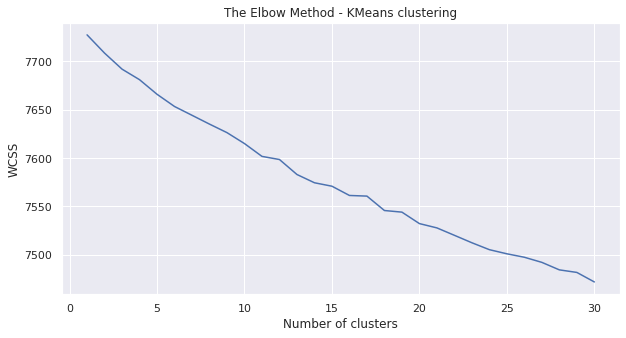

In [87]:
# finding optimal number of clusters using the elbow method  
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state= 33)
  kmeans.fit(X)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

**The sum of squared distance between each point and the centroid in a cluster (WCSS) decreases with the increase in the number of clusters.**

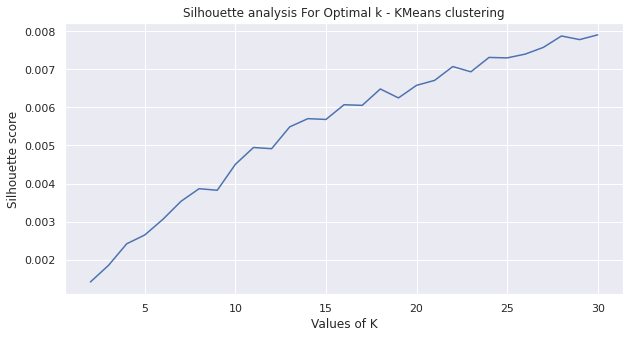

In [88]:
# Plotting Silhouette score for different number of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(X)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(X, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [89]:
#sillhoute score of clusters 
sill = [] 
for i in range(2,31):
    model = KMeans(n_clusters=i,init ='k-means++',random_state = 51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

cluster: 2 	 Sillhoute: 0.0014
cluster: 3 	 Sillhoute: 0.0016
cluster: 4 	 Sillhoute: 0.0023
cluster: 5 	 Sillhoute: 0.0030
cluster: 6 	 Sillhoute: 0.0032
cluster: 7 	 Sillhoute: 0.0034
cluster: 8 	 Sillhoute: 0.0038
cluster: 9 	 Sillhoute: 0.0043
cluster: 10 	 Sillhoute: 0.0045
cluster: 11 	 Sillhoute: 0.0048
cluster: 12 	 Sillhoute: 0.0053
cluster: 13 	 Sillhoute: 0.0054
cluster: 14 	 Sillhoute: 0.0057
cluster: 15 	 Sillhoute: 0.0054
cluster: 16 	 Sillhoute: 0.0059
cluster: 17 	 Sillhoute: 0.0062
cluster: 18 	 Sillhoute: 0.0064
cluster: 19 	 Sillhoute: 0.0068
cluster: 20 	 Sillhoute: 0.0069
cluster: 21 	 Sillhoute: 0.0067
cluster: 22 	 Sillhoute: 0.0065
cluster: 23 	 Sillhoute: 0.0069
cluster: 24 	 Sillhoute: 0.0073
cluster: 25 	 Sillhoute: 0.0071
cluster: 26 	 Sillhoute: 0.0073
cluster: 27 	 Sillhoute: 0.0074
cluster: 28 	 Sillhoute: 0.0078
cluster: 29 	 Sillhoute: 0.0076
cluster: 30 	 Sillhoute: 0.0078


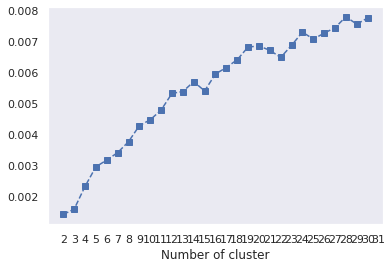

In [98]:
#Plotting Sillhoute's score
plt.plot(sill,'bs--')
plt.xticks(list(range(0,30)),list(range(2,32)))
plt.grid(),plt.xlabel('Number of cluster')
plt.show()

In [99]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters= 26, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X) 

In [100]:
# Predict the clusters and evaluate the silhouette score
score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.00741554646855992


In [101]:
# Adding a seperate column for the cluster
df["cluster"] = y_predict

In [102]:
df['cluster'].value_counts()

3     2543
15     412
0      309
4      297
21     287
6      285
17     273
1      265
7      265
8      260
12     239
19     232
22     218
18     208
9      187
13     162
23     155
5      154
20     142
25     137
11     134
2      131
10     130
16     124
24     123
14     105
Name: cluster, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='count'>

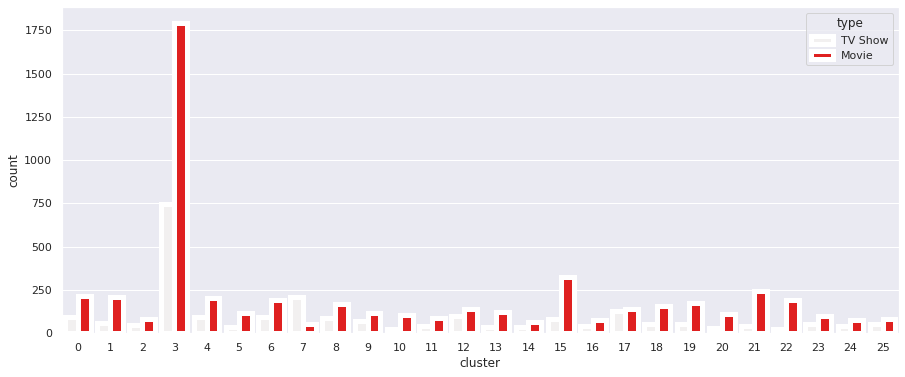

In [103]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='cluster', hue='type',lw=5, color='red', data=df, ax=ax)

In [104]:
# SCATTER PLOT FOR CLUSTERS
fig = px.scatter(df, y="description", x="cluster",color="cluster")
fig.update_traces(marker_size= 80)
fig.show()

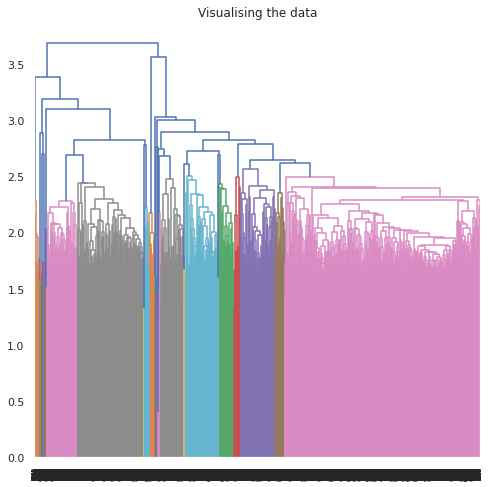

In [105]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

In [106]:
# Fitting our variable in Agglomerative Clusters
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
aggh.fit(X)
#Predicting using our model
y_hc=aggh.fit_predict(X)

In [107]:
df_hierarchical =df.copy()
# creating a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = aggh.labels_
df_hierarchical.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,target_ages,cluster
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4,International TV Shows,future elite inhabit island paradise far crowd...,8,2020,Adults,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,Dramas,devastating earthquake hits mexico city trappe...,12,2016,Adults,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,Horror Movies,army recruit found dead fellow soldiers forced...,12,2018,Adults,4
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80,Action & Adventure,postapocalyptic world ragdoll robots hide fear...,11,2017,Teens,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123,Dramas,brilliant group students become cardcounting e...,1,2020,Teens,0


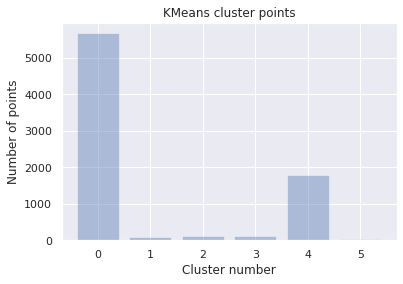

In [108]:
# Analysing number of points present in each clusters
plt.bar([x for x in range(6)], df_hierarchical.groupby(['cluster'])['description'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [109]:
# Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X, aggh.labels_, metric='euclidean'))

Silhouette Coefficient: -0.002


## **CONCLUSION**

> In this project, we worked on a text clustering problem wherein we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

> The dataset contained about 7787 records, and 12 attributes.
We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).

> It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.

> It was decided to cluster the data based on the attributes: director, cast, country, genre, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

> Through TFIDF Vectorization, we created a total of 20000 attributes.
We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.

> We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis.

> Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.

> A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.